In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import torch.nn as nn
import tensorflow as tf

In [11]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [12]:
# optm = torch.optim.Adam(NN.parameters(), lr=0.001)
optm = tf.keras.optimizers.Adam(learning_rate = 0.001)


In [13]:
def ode_system(t, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    t_1 = tf.ones((1,1))
    t_2 = tf.ones(tuple(t.shape))*(-2)

    with tf.GradientTape() as tape2:
        tape2.watch(t)
        with tf.GradientTape() as tape:
            tape.watch(t)

            u = net(t)
            u_t_1 = tape.gradient(u, t)
        u_t = tape2.gradient(u_t_1, t)

    ode_loss = u_t - t_2
    IC_loss_1 = net(t_0) - t_0
    IC_loss_2 = net(t_1) - t_0

    square_loss = tf.square(ode_loss) + tf.square(IC_loss_1) + tf.square(IC_loss_2)
    total_loss = tf.reduce_mean(square_loss)

    return total_loss

4.087773
0.00058122986
0.00021217484
0.00028237037
2.8960932e-05
1.065594e-05


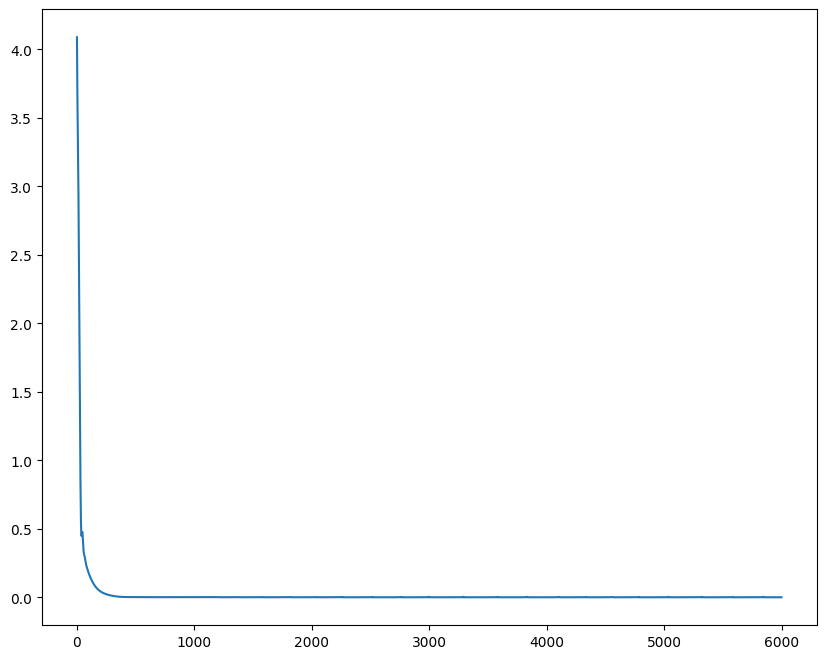

In [14]:
train_t = (np.random.rand(30)).reshape(-1, 1)
train_loss_record = []

for itr in range(6000):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, NN.trainable_variables)
        optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 1000 == 0:
        print(train_loss.numpy())

plt.figure(figsize = (10,8))
plt.plot(train_loss_record)
plt.show()

4/4 [==============================] - 0s 3ms/step


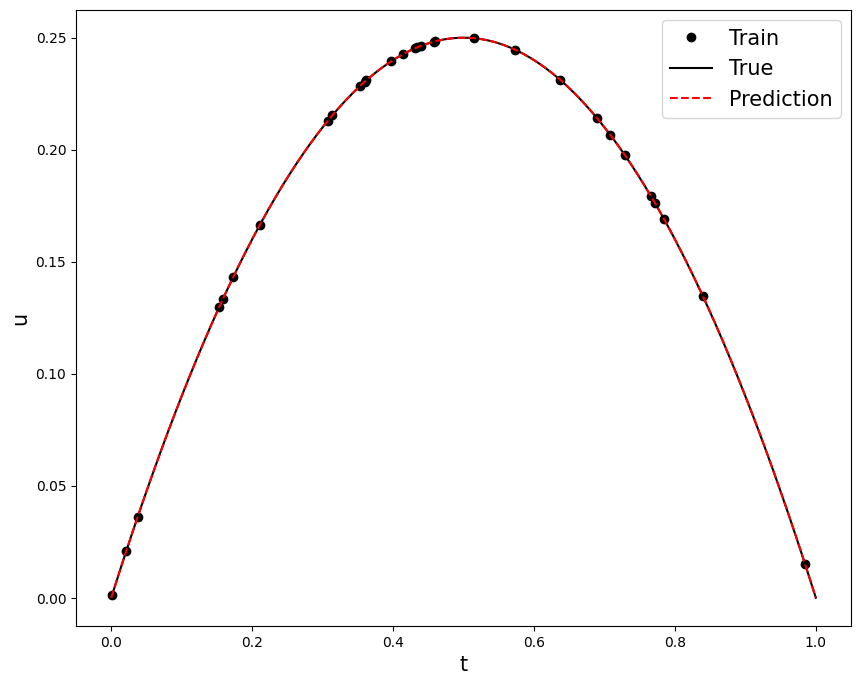

In [15]:
test_t = np.linspace(0, 1, 100)

train_u = train_t * (1 - train_t)
true_u = test_t * (1 - test_t)
pred_u = NN.predict(test_t).ravel()

plt.figure(figsize = (10,8))
plt.plot(train_t, train_u, 'ok', label = 'Train')
plt.plot(test_t, true_u, '-k',label = 'True')
plt.plot(test_t, pred_u, '--r', label = 'Prediction')
plt.legend(fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.show()

In [16]:
train_t

array([[0.70860262],
       [0.00104887],
       [0.63671517],
       [0.17299459],
       [0.51487819],
       [0.43937783],
       [0.78439595],
       [0.31389259],
       [0.15317285],
       [0.02123408],
       [0.39763802],
       [0.36194633],
       [0.15861582],
       [0.72882335],
       [0.98478755],
       [0.35316815],
       [0.0375843 ],
       [0.689491  ],
       [0.30731797],
       [0.35965534],
       [0.76576105],
       [0.43420207],
       [0.77152832],
       [0.45743084],
       [0.57341401],
       [0.43058291],
       [0.83966129],
       [0.45949873],
       [0.41344122],
       [0.21093715]])

In [17]:
test_t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747